In [1]:
%matplotlib notebook

In [10]:
from pninexus import h5cpp
from pninexus.h5cpp.file import AccessFlags
from pninexus.h5cpp.property import LinkCreationList, DatasetCreationList, DatasetLayout
from pninexus.h5cpp.dataspace import Hyperslab,UNLIMITED,Simple
from pninexus.h5cpp.node import Dataset
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.collections import PathCollection
import numpy

In [4]:
h5file = h5cpp.file.open("roi.h5",AccessFlags.READONLY)
root   = h5file.root()
dataset = root.nodes["data"]

In [22]:
def plot_rois(ax):
    
    ax.add_patch(Rectangle((200,85),200,300,fill=False,edgecolor="white",linewidth=1.3))
    ax.add_patch(Rectangle((645,137),200,300,fill=False,edgecolor="white",linewidth=1.3))
    ax.text(200,40,"ROI 1",color="white")
    ax.text(645,100,"ROI 2",color="white")
    
def plot_expected(ax):
    
    pyplot.plot(300,200,'ro')
    pyplot.plot(745,300,'ro')
    
def plot_frame(data,title,ax):
    pyplot.pcolor(numpy.log10(data),edgecolors='none')
    plot_rois(ax)
    plot_expected(ax)
    pyplot.colorbar()
    pyplot.title(title)

In [19]:
frame = Hyperslab(offset=(0,0,0),block=(1,512,1024))
roi1 = Hyperslab(offset=(0,85,200),block=(200,300,200))
roi2 = Hyperslab(offset=(0,137,645),block=(200,300,200)) 

data_roi1 = dataset.read(selection=roi1)
data_roi2 = dataset.read(selection=roi2)
int_roi1 = data_roi1.sum(axis=(1,2))
int_roi2 = data_roi2.sum(axis=(1,2))

<IPython.core.display.Javascript object>


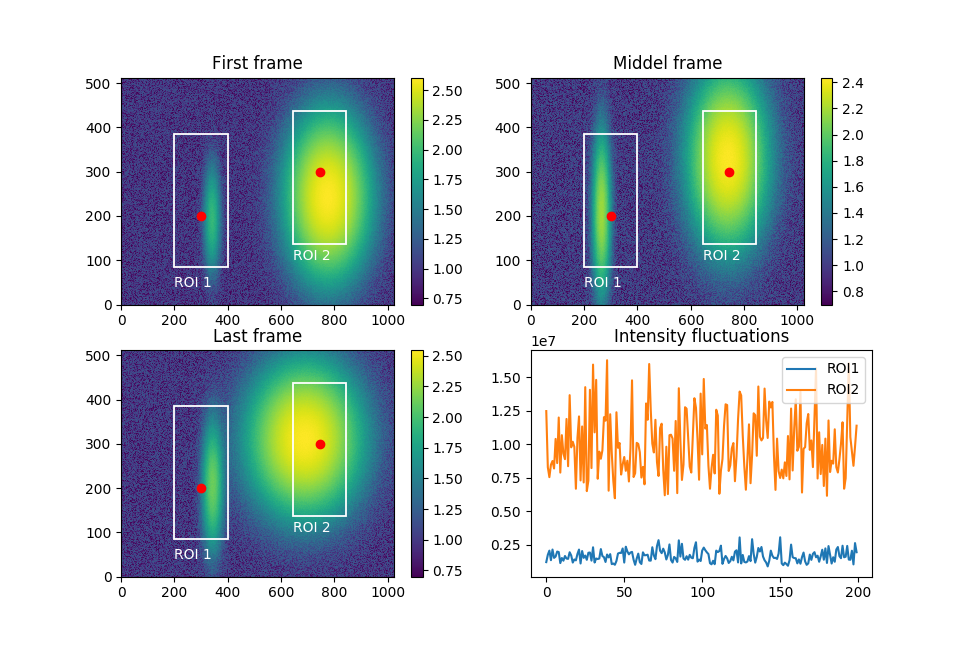

In [24]:
#
# reading 3 frames
#
frame.offset(0,0)
first_frame = dataset.read(selection=frame)
frame.offset(0,100)
middle_frame = dataset.read(selection=frame)
frame.offset(0,199)
last_frame = dataset.read(selection=frame)

ax = pyplot.subplot(221)
plot_frame(first_frame,"First frame",ax)
plot_frame(middle_frame,"Middel frame",pyplot.subplot(222))
plot_frame(last_frame,"Last frame",pyplot.subplot(223))
pyplot.subplot(224)
pyplot.title("Intensity fluctuations")
pyplot.plot(int_roi1)
pyplot.plot(int_roi2)
pyplot.legend(("ROI1","ROI2"))